In [61]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_All.csv'
initial_data = pd.read_csv(data_path)

/var/folders/n3/spvzfspj1gn51bldz75lhrt40000gn/T/ipykernel_50995/3892218257.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_data = pd.read_csv(data_path)


In [63]:
# copy data (it's faster to copy than to load it again)
bike_data = initial_data.copy()

In [64]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180626 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 811.4+ MB


In [65]:
# check for null values
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

In [66]:
# check for missing values
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

convert the object type columns to more useful data types

In [67]:
# convert categorical data
bike_data['rideable_type'] = pd.Categorical(bike_data['rideable_type'])
bike_data['member_casual'] = pd.Categorical(bike_data['member_casual'])

In [68]:
# convert datetime data
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'])
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'])

In [69]:
# droping the two rows with 'MTL-ECO5-03' as this is probably an error
bike_data = bike_data.drop(bike_data[bike_data['end_station_id'] == 'MTL-ECO5-03'].index)

In [70]:
len(bike_data['start_station_id'].unique())

1863

In [71]:
# convert station id's
bike_data['end_station_id'] = pd.to_numeric(bike_data['end_station_id'], errors='coerce')
bike_data['start_station_id'] = pd.to_numeric(bike_data['start_station_id'], errors='coerce')

In [72]:
len(bike_data['start_station_id'].unique())

746

In [73]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8180624 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(6), object(3)
memory usage: 764.6+ MB


In [74]:
# investigate the missing values
bike_data[bike_data['start_station_name'].isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.93,-77.03,38.956738,-77.027940,casual
20,997E8E08C493F034,electric_bike,2021-01-01 00:27:18,2021-01-01 00:34:30,NaN,NaN,NaN,NaN,38.99,-77.03,38.990000,-77.030000,member
22,87E06BFC439643DA,electric_bike,2021-01-01 00:32:44,2021-01-01 00:32:51,NaN,NaN,NaN,NaN,38.89,-76.99,38.890000,-76.990000,casual
24,6E4F247C2E3358BA,electric_bike,2021-01-01 00:35:51,2021-01-01 00:37:57,NaN,NaN,Lincoln Park / 13th & East Capitol St NE,31619.0,38.89,-76.99,38.890484,-76.988408,casual
37,60807578738CDEB8,electric_bike,2021-01-01 00:50:13,2021-01-01 00:57:14,NaN,NaN,NaN,NaN,38.95,-77.03,38.930000,-77.040000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180602,EB82BDB804277B1E,electric_bike,2023-06-30 23:54:09,2023-07-01 00:01:59,NaN,NaN,NaN,NaN,38.88,-77.01,38.870000,-77.010000,member
8180609,7892BA16C781301C,electric_bike,2023-06-30 23:55:25,2023-07-01 00:08:17,NaN,NaN,Cordell & Norfolk Ave,32008.0,38.98,-77.09,38.989540,-77.098029,casual
8180614,C215A43FB51B4F54,electric_bike,2023-06-30 23:55:44,2023-07-01 00:16:58,NaN,NaN,NaN,NaN,38.92,-77.03,38.880000,-77.020000,member
8180620,BA67AE126D50EE25,electric_bike,2023-06-30 23:57:29,2023-07-01 00:00:07,NaN,NaN,NaN,NaN,38.96,-77.00,38.960000,-77.000000,member


In [75]:
bike_data[bike_data['start_station_name'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    468710
classic_bike          0
docked_bike           0
Name: count, dtype: int64

In [76]:
bike_data['rideable_type'].value_counts()

rideable_type
classic_bike     6157609
electric_bike    1521056
docked_bike       501959
Name: count, dtype: int64

Electric bikes **DON'T NEED** to have a start station, but **CAN** have one.

In [77]:
bike_data[bike_data['end_station_name'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    499453
classic_bike      17034
docked_bike        4571
Name: count, dtype: int64

Looks like some bikes just get lost. Let's try to find them.

In [78]:
# find all the end stations with their respective geolocations
end_stations = bike_data[bike_data['end_station_name'].notna()][['end_station_name', 'end_station_id', 'end_lat', 'end_lng']]
end_stations

,end_station_name,end_station_id,end_lat,end_lng
0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.894600,-77.072305
2,14th & Belmont St NW,31119.0,38.920870,-77.031691
3,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563
4,14th & Newton St NW,31649.0,38.931991,-77.032956
5,Georgia Ave & Kennedy St NW,31415.0,38.956738,-77.027940
...,...,...,...,...
8180619,4th & W St NE,31500.0,38.919077,-77.000648
8180621,14th & Newton St NW,31649.0,38.931991,-77.032956
8180622,Massachusetts Ave & Dupont Circle NW,31200.0,38.910100,-77.044400
8180623,Massachusetts Ave & Dupont Circle NW,31200.0,38.910100,-77.044400


In [79]:
# check if any of this data is missing
end_stations.isnull().sum()

end_station_name    0
end_station_id      0
end_lat             0
end_lng             0
dtype: int64

In [80]:
end_stations.drop_duplicates()

,end_station_name,end_station_id,end_lat,end_lng
0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.894600,-77.072305
2,14th & Belmont St NW,31119.0,38.920870,-77.031691
3,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563
4,14th & Newton St NW,31649.0,38.931991,-77.032956
5,Georgia Ave & Kennedy St NW,31415.0,38.956738,-77.027940
...,...,...,...,...
8106181,17th St & Independence Ave SW,31290.0,38.888116,-77.038423
8120848,5th & Morse St NE,31536.0,38.907349,-76.999172
8138032,Jones Branch Dr & Blyton St,32269.0,38.926973,-77.217376
8143120,Arlington Blvd & Allen St,32268.0,38.866315,-77.199799


In [81]:
end_stations_with_ids = end_stations[['end_station_name', 'end_station_id']].drop_duplicates().sort_values(by='end_station_name')
end_stations_with_ids

,end_station_name,end_station_id
640,10th & E St NW,31256.0
347,10th & Florida Ave NW,31120.0
1939,10th & G St NW,31274.0
2555549,10th & H St NE,31672.0
23,10th & K St NW,31263.0
...,...,...
218,Woodglen Dr & Executive Blvd,32078.0
735,Woodley Park Metro / Calvert St & Connecticut ...,31323.0
2936,Woodmont Ave & Strathmore St,32055.0
6314949,Woody Ward Rec Center,31722.0


In [82]:
end_stations_with_ids.to_csv('end_stations_with_ids.csv')

In [93]:
end_stations_with_ids[end_stations_with_ids['end_station_name'].duplicated()]

,end_station_name,end_station_id
2912618,16th & Harvard St NW,31135.0
4698788,Fairfax Dr & N Taylor St,31049.0


In [92]:
end_stations_with_ids[end_stations_with_ids['end_station_id'].duplicated()]

,end_station_name,end_station_id
4905931,10th St & Florida Ave NW,31120.0
4926108,10th St & Rhode Island Ave NE,31535.0
2062374,11th & V st NW,31332.0
5091223,14th St & Luzon Ave NW,31416.0
7295403,14th St & Rhode Island Ave NW,31203.0
...,...,...
18902,White Flint Metro,32075.0
5461389,Wiehle-Reston Metro South,32215.0
1504388,Wilson Blvd & Ft Myer Dr,31015.0
89253,Wilson Blvd & N Quinn St,31027.0


In [85]:
len(end_stations['end_station_id'].unique())

748

In [86]:
len(end_stations['end_station_name'].unique())

818

In [87]:
bike_data[bike_data['end_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.96,-77.02,casual
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.90,-77.02,casual
17,3F8AFD9540FF8EDB,electric_bike,2021-01-01 00:26:41,2021-01-01 00:30:09,14th & Harvard St NW,31105.0,NaN,NaN,38.926715,-77.032145,38.93,-77.04,member
20,997E8E08C493F034,electric_bike,2021-01-01 00:27:18,2021-01-01 00:34:30,NaN,NaN,NaN,NaN,38.990000,-77.030000,38.99,-77.03,member
21,F1F87FA560990FC7,electric_bike,2021-01-01 00:28:39,2021-01-01 00:41:31,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,NaN,NaN,38.934253,-77.058010,38.92,-77.07,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180602,EB82BDB804277B1E,electric_bike,2023-06-30 23:54:09,2023-07-01 00:01:59,NaN,NaN,NaN,NaN,38.880000,-77.010000,38.87,-77.01,member
8180614,C215A43FB51B4F54,electric_bike,2023-06-30 23:55:44,2023-07-01 00:16:58,NaN,NaN,NaN,NaN,38.920000,-77.030000,38.88,-77.02,member
8180617,4D371A6AF5E76AF1,electric_bike,2023-06-30 23:56:40,2023-07-01 00:03:58,California St & Florida Ave NW,31116.0,NaN,NaN,38.917730,-77.040680,38.94,-77.04,member
8180620,BA67AE126D50EE25,electric_bike,2023-06-30 23:57:29,2023-07-01 00:00:07,NaN,NaN,NaN,NaN,38.960000,-77.000000,38.96,-77.00,member


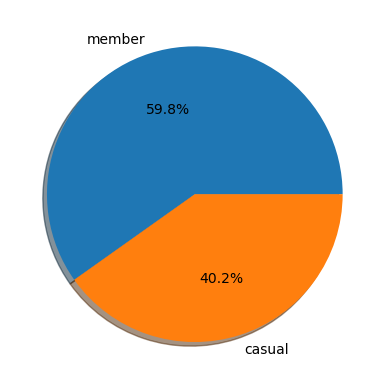

In [88]:
# check membership type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['member_casual'].value_counts()

# labels for each section of the pie chart
labels=bike_data['member_casual'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()

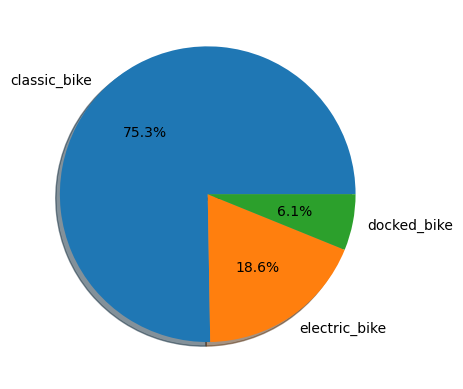

In [89]:
# check bike type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['rideable_type'].value_counts()

# labels for each section of the pie chart
labels=bike_data['rideable_type'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()